# Práctica 2: Procesamiento del Lenguaje Natural

__Fecha de entrega: 5 de abril de 2022__

El objetivo de esta práctica es aplicar los conceptos teóricos vistos en clase en el módulo de PLN. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [4]:
RANDOM_STATE = 42

Número de grupo: 02

Nombres de los estudiantes: Jesus Martin y Jorge Arevalo

# Apartado 1: Clasificador de noticias

## 1) Carga del conjunto de datos

El fichero `BBC News.csv` contiene noticias clasificadas en 5 categorías diferentes. 

Carga los datos en un dataframe teniendo en cuenta que la columna `ArticleId` es un identificador de la noticia y por lo tanto no debes usarlo para clasificar. 

Estudia el tamaño del conjunto de datos y la proporción de noticias que pertenecen a cada una de las categorías. Indica si debemos tenerlo en cuenta de alguna forma al analizar los modelos que construyamos.

Muestra un mensaje cualquiera y explica si lo habrías clasificado en la clase correcta tras leerlo.

Crea una partición de los datos dejando el 80% para entrenamiento y el 20% restante para test usando la función `train_test_split` de sklearn. 

clasificador de noticias, hay varios tipos de noticias, hay que partir 80(entrenamiento) 20(test)y hay q representar mendiante bolsa de palabras, monogramas con frecuencia de aparacion de cada palabra con sklearn, aplicar vectorizacion para entrenamiento y test, mostrar un mensaje de texto normal y vectorizacdo.
calcular.
no hace falta buscar valores de k para knn.
comparar parte 2 con word embeding.
word embeding mirar el notebook, para cargarla...., y vamos a hacer math entre palabra vectorizada(tokens) y la word embeding y calcular el vector medio(media de las dimensiones de las palabras a buscar) de cada  ... igual que en el notebook con el texto corto. caracterizar cada noticia por su vector medio.
compraar knn o gausiano y analizar el error y los datos, por ver si los datos son diversos.
fijarse notebooks y diapositivas

In [5]:
import pandas as pd
df = pd.read_csv("BBC News.csv")
print(df)
#eliminamos la columna ArticleId para clasificar
df = df.drop(['ArticleId'], axis=1)
print(df)

      ArticleId                                               Text  \
0          1833  worldcom ex-boss launches defence lawyers defe...   
1           154  german business confidence slides german busin...   
2          1101  bbc poll indicates economic gloom citizens in ...   
3          1976  lifestyle  governs mobile choice  faster  bett...   
4           917  enron bosses in $168m payout eighteen former e...   
...         ...                                                ...   
1485        857  double eviction from big brother model caprice...   
1486        325  dj double act revamp chart show dj duo jk and ...   
1487       1590  weak dollar hits reuters revenues at media gro...   
1488       1587  apple ipod family expands market apple has exp...   
1489        538  santy worm makes unwelcome visit thousands of ...   

           Category  
0          business  
1          business  
2          business  
3              tech  
4          business  
...             ...  
1485 

In [6]:
#podemos ver la frecuencia de cada categoria
freq = df['Category'].value_counts() 
print(freq) 
#podemos ver que tienen una frecuencia parecida aun que el tema que mas influye es el deporte seguido de los negocios

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64


In [7]:
print(df.head())

                                                Text  Category
0  worldcom ex-boss launches defence lawyers defe...  business
1  german business confidence slides german busin...  business
2  bbc poll indicates economic gloom citizens in ...  business
3  lifestyle  governs mobile choice  faster  bett...      tech
4  enron bosses in $168m payout eighteen former e...  business


In [8]:
#mostraremos la primera fila para analizar si esta bien adjudicado la categoria a la que pertenece
print(df.iloc[0]['Text'])
print(df.iloc[0]['Category'])

worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebbe

Tras leerlo lo habria clasificado en businees ya que habla sobre ambitos empresariales ademas de contener palabras claves como exjefe, compañia, abogados, fraude, empresa....
Con la unica categoria que se podria llegar a tener algunas dudas si podria pertenecer seria politica, pero como he dicho antes este texto tiene palabras caracteristicas claras de un texto de un ambiente empresarial o de negocios.

In [9]:
#Creamos una partición de los datos dejando el 80% para entrenamiento y el 20% restante para test 
from sklearn.model_selection import train_test_split
#train_data, test_data = train_test_split(df, test_size=0.2)
train_data, test_data, train_category, test_category  = train_test_split(df['Text'], df['Category'], test_size = 0.2)

In [10]:
train_data

29      iran budget seeks state sell-offs iran s presi...
781     comic morris returns with sitcom comedian chri...
820     levy tipped for whitbread prize novelist andre...
1242    blair ready to call election tony blair seems ...
1000    middlesbrough 2-2 charlton a late header by te...
                              ...                        
1309    saudi ministry to employ women women will be e...
190     the producers scoops stage awards the producer...
713     straw praises kashmir moves the uk has welcome...
692     s korean credit card firm rescued south korea ...
600     newcastle line up babayaro newcastle manager g...
Name: Text, Length: 1192, dtype: object

In [11]:
test_data

119     o sullivan quick to hail italians ireland coac...
92      straw attacked on china arms moves to lift the...
341     hillbillies singer scoggins dies country and w...
1399    wmc says xstrata bid is too low australian min...
892     palestinian economy in decline despite a short...
                              ...                        
1448    keegan hails comeback king fowler manchester c...
290     baywatch dubbed  worst tv import  surf show ba...
215     kilroy-silk attacked with slurry euro mp rober...
144     broadband fuels online expression fast web acc...
869     a decade of good website design the web looks ...
Name: Text, Length: 298, dtype: object

In [12]:
train_category

29           business
781     entertainment
820     entertainment
1242         politics
1000            sport
            ...      
1309         business
190     entertainment
713          politics
692          business
600             sport
Name: Category, Length: 1192, dtype: object

In [13]:
test_category

119             sport
92           politics
341     entertainment
1399         business
892          business
            ...      
1448            sport
290     entertainment
215          politics
144              tech
869              tech
Name: Category, Length: 298, dtype: object

## 2) Representación basada en bolsa de palabras y frecuencia de aparición

La primera vectorización que vamos a usar representará los mensajes usando el modelo de bolsa de palabras, monogramas y la frecuencia de aparición de cada palabra. Usa como _stop words_ las que vienen configuradas por defecto para el inglés.

Aplica la vectorización a los conjuntos de mensajes de entrenamiento y test. Muestra algún mensaje tanto en su formato de texto original como en la versión vectorizada. ¿Qué palabras se han eliminado y por qué?

Entrena un clasificador Naive Bayes Multinomial y calcula su tasa de aciertos sobre el conjunto de entrenamiento y el conjunto de test. A continuación calcula los valores de precisión, exhaustividad y puntuación F1 para cada una de las clases. Dibuja la matriz de confusión. Analiza los resultados obtenidos.

A continuación, entrena un clasificador k-NN con la configuración por defecto y usando la misma vectorización. Analiza los resultados, ¿a qué crees que se deben?

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#binary la mas relevante
vectorizer = CountVectorizer(stop_words='english', binary=False, ngram_range=(1,1))
# Tomamos los textos del conjunto de entrenamiento y los transformamos en 
# una matriz de datos (palabras) según el diccionario estándar

In [15]:
train_vector_data = vectorizer.fit_transform(train_data)

In [16]:
print(train_vector_data)

  (0, 11019)	3
  (0, 3566)	5
  (0, 17959)	1
  (0, 19145)	2
  (0, 17992)	2
  (0, 14194)	1
  (0, 15644)	2
  (0, 13368)	1
  (0, 11528)	8
  (0, 21182)	1
  (0, 6198)	1
  (0, 7767)	1
  (0, 15982)	1
  (0, 18918)	1
  (0, 522)	1
  (0, 12314)	1
  (0, 11065)	1
  (0, 16897)	1
  (0, 6127)	1
  (0, 14213)	4
  (0, 8312)	1
  (0, 22248)	6
  (0, 19139)	1
  (0, 409)	1
  (0, 12669)	2
  :	:
  (1191, 12596)	1
  (1191, 9272)	1
  (1191, 18797)	3
  (1191, 20575)	1
  (1191, 15261)	1
  (1191, 10610)	1
  (1191, 19366)	1
  (1191, 13784)	1
  (1191, 3156)	1
  (1191, 5181)	1
  (1191, 358)	1
  (1191, 5846)	1
  (1191, 10079)	1
  (1191, 21983)	1
  (1191, 19677)	1
  (1191, 16911)	1
  (1191, 2920)	1
  (1191, 18399)	1
  (1191, 1355)	1
  (1191, 463)	1
  (1191, 18883)	1
  (1191, 4071)	1
  (1191, 2410)	3
  (1191, 16838)	1
  (1191, 1767)	1


In [17]:
test_vector_data = vectorizer.transform(test_data)

In [18]:
print(test_vector_data)

  (0, 47)	1
  (0, 204)	1
  (0, 420)	2
  (0, 487)	1
  (0, 2241)	1
  (0, 2506)	2
  (0, 2683)	1
  (0, 3399)	1
  (0, 4607)	1
  (0, 4748)	1
  (0, 5263)	1
  (0, 5483)	1
  (0, 6890)	1
  (0, 7095)	1
  (0, 7341)	1
  (0, 7555)	1
  (0, 8198)	1
  (0, 8495)	1
  (0, 8844)	4
  (0, 8997)	1
  (0, 9094)	1
  (0, 9202)	1
  (0, 9230)	2
  (0, 9510)	1
  (0, 9513)	1
  :	:
  (297, 20236)	2
  (297, 20379)	3
  (297, 20389)	1
  (297, 20422)	2
  (297, 20459)	1
  (297, 20750)	1
  (297, 21254)	1
  (297, 21261)	6
  (297, 21267)	5
  (297, 21268)	1
  (297, 21269)	3
  (297, 21273)	4
  (297, 21274)	1
  (297, 21538)	1
  (297, 21736)	1
  (297, 21788)	4
  (297, 21804)	3
  (297, 21805)	2
  (297, 21930)	1
  (297, 22096)	2
  (297, 22098)	1
  (297, 22119)	1
  (297, 22223)	2
  (297, 22248)	1
  (297, 22252)	2


In [19]:
#Vamos a ver cómo han quedado los términos con los parámetros por defecto y cuántos términos hay.
feature_names = vectorizer.get_feature_names()

print(len(feature_names))
print(feature_names[:5000])

22367
['00', '000', '0001', '000bn', '000m', '000th', '001st', '0051', '007', '01', '0100', '0130', '028', '03', '0400', '041', '04bn', '04secs', '05', '050', '050505', '0530', '0530gmt', '056', '05bn', '05m', '06', '060', '0630', '069', '07', '070', '0700', '0710', '072', '0730', '08', '080', '0800', '0845', '0870', '088', '09', '0900', '093', '09bn', '09secs', '10', '100', '1000m', '1000th', '100bn', '100m', '100ml', '101', '102', '103', '104', '105', '105bn', '105m', '106', '106m', '107', '108', '1080', '109', '10bn', '10ft', '10m', '10secs', '10th', '11', '110', '1100', '110m', '110th', '111', '1115', '111m', '112', '113', '1130', '1130p', '113bn', '115', '116', '117', '117m', '118', '119', '119bn', '119m', '11bn', '11m', '11pm', '11th', '12', '120', '1200', '1200m', '120bn', '120gb', '120m', '121', '1230', '125', '125m', '127th', '128', '12a', '12bn', '12cm', '12m', '12th', '13', '130', '1300', '130m', '132', '133', '1330', '133m', '134', '135', '136', '137', '138m', '138p', '139'

In [20]:
#Vamos a ver los términos extraídos para los mensajes de antes.
import numpy as np
import numpy.ma as ma

def write_terms (feature_names, data, vector_data, index):
    '''
    Escribe los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - data: lista de mensajes original (si data==None no se muestra el mensaje original)
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    # máscara para seleccionar sólo el mensaje en posición index
    mask=vector_data[index,:]>0
    
    # términos que aparecen en ese mensaje vectorizado
    terminos = ma.array(feature_names, mask = ~(mask[0].toarray()))
    
    # mostrar mensaje original
    if data is not None:
        print('Mensaje', index, ':', data[index])
    
    # mostrar términos que aparecen en el mensaje vectorizado
    print('Mensaje', index, 'vectorizado:', terminos.compressed(),'\n')

In [21]:
#write_terms(feature_names, train_data.data, train_vector_data, 10)
write_terms(feature_names, None, train_vector_data, 10)

write_terms(feature_names, None, train_vector_data, 100)

Mensaje 10 vectorizado: ['13' '19' 'able' 'absolutely' 'african' 'ahead' 'andy' 'awesome' 'ball'
 'bbc' 'blasts' 'bodies' 'called' 'came' 'chance' 'charge' 'charlie'
 'clive' 'coach' 'consult' 'cope' 'corry' 'cost' 'couple' 'crashed'
 'credit' 'cross' 'cueto' 'decisions' 'declined' 'defended' 'denied' 'did'
 'didn' 'disappointed' 'dominated' 'don' 'doubt' 'dublin' 'dying' 'effort'
 'england' 'famous' 'field' 'fly' 'forwards' 'fourth' 'fuming' 'game'
 'games' 'gather' 'given' 'gone' 'good' 'got' 'half' 'hodgson' 'hoisted'
 'hurt' 'ireland' 'irish' 'jonathan' 'josh' 'kaplan' 'kick' 'know' 'legal'
 'lewis' 'lewsey' 'likes' 'line' 'livid' 'looked' 'loss' 'lost'
 'magnificently' 'mark' 'martin' 'matches' 'matt' 'minutes' 'moody'
 'nations' 'official' 'officials' 'offside' 'perfectly' 'pile' 'players'
 'pressure' 'prop' 'proud' 'referee' 'replays' 'robinson' 'rugby' 'ruled'
 'said' 'sale' 'scored' 'september' 'sir' 'south' 'spitting' 'sport'
 'spurned' 'stevens' 'stood' 'sunday' 'technology'

podemos ver como ha eliminado palabras irrelevantes como numeros o fechas, ademas de palabras como meses(febrero o septiembre), ademas de palabras normalmente comunes como think, today, time.....
tambien podemos ver que eliminada psoibles palabras relevantes dependiendo del tema, como podria ser confidence o economia, respecto a temas de negocios o politica , aunque las eliminada porque pueden ser ambiguas dependiendo del contexto.

In [22]:
# Calculamos el valor TF-IDF 
#Pasamos las ferceuncias TF-IDF 
tfidfer = TfidfTransformer()
train_preprocessed = tfidfer.fit_transform(train_vector_data)

print(train_preprocessed[10])

  (0, 22248)	0.020388449827309064
  (0, 22098)	0.035036067931643766
  (0, 22086)	0.06680006258990306
  (0, 22003)	0.08377329978675943
  (0, 21993)	0.06338017775568379
  (0, 21978)	0.0701982130268547
  (0, 21762)	0.030190942201958032
  (0, 21468)	0.04507823705159167
  (0, 21466)	0.04720456984528118
  (0, 21377)	0.1269838929678098
  (0, 21268)	0.03568114115936451
  (0, 21267)	0.035162462671270184
  (0, 21230)	0.06680006258990306
  (0, 20814)	0.04221617540223954
  (0, 20750)	0.04564997962994826
  (0, 20749)	0.13523471115477498
  (0, 20676)	0.1792867166863656
  (0, 20417)	0.07600110448758433
  (0, 20389)	0.029363263928681264
  (0, 20317)	0.08423433716275497
  (0, 20236)	0.041565538727963175
  (0, 20212)	0.07123024872699499
  (0, 20023)	0.081693409513269
  (0, 19589)	0.04244075584756224
  (0, 19289)	0.06399377119041236
  :	:
  (0, 5453)	0.07719651346830711
  (0, 5392)	0.05173754276745209
  (0, 5338)	0.04439827844579047
  (0, 5325)	0.06847937618188114
  (0, 5263)	0.06021960459773693
  (0, 51

Para probar los clasificadores en el conjunto de prueba, debemos transformar también los mensajes en bolsas de palabras con TF/IDF usando el CountVectorizer y TfidfTransformer ajustados con el conjunto de entrenamiento.

In [23]:
# Tomamos los textos del conjunto de test y los transformamos en una matriz
# de palabras. Al usar "transform" toma como referencia únicamente las palabras
# encontradas en el conjunto de entrenamiento
#pasamos esta configuracion para el conjunto de entrenamiento, pasamos dos matrices, conjunto de evlauacion y entrenamiento
test_vector_data=vectorizer.transform(test_data)
# Calculamos el valor TF-IDF 
# Al usar "transform" toma como IDF el del conjunto de entrenamiento 
test_preprocessed=tfidfer.transform(test_vector_data)

Pasamos a elegir distintos clasificadores. Usaremos clasificadores naive bayes y árbol de decisión eligiendo para cada uno de ellos el mas conveniente.
-  Naive bayes:
    - Bolsa de palabras binarias con n-grama (1,1): Usaremos el clasificador "Naive Bayes Multinomial Binarizado" ya que es el mas conveniente para esta bolsa de palabras. Esto se debe a que lo importante es la presencia de palabras que indiquen sentimiento. En nuestro caso asi seria ya que buscamos comentarios posisivos o negativos.

In [24]:
#clasifica los texts suponiendo que nuestros terminos o variables son independientes unas de otras
#

from sklearn.naive_bayes import MultinomialNB

mnb_classifier = MultinomialNB()

mnb_classifier.fit(train_preprocessed, train_category)

mnb_train_predictions = mnb_classifier.predict(train_preprocessed)
mnb_test_predictions = mnb_classifier.predict(test_preprocessed)
#calculamos las tasas de acierto  train_category, test_category
print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions == train_category))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions == test_category))

Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9949664429530202
Multinomial Naive Bayes, porcentaje de aciertos en test: 0.9496644295302014


A continuación calcula los valores de precisión, exhaustividad y puntuación F1 para cada una de las clases.
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

classifier=mnb_classifier
print(classification_report(test_category, mnb_test_predictions, target_names=("sport","business","politics","entertainment","tech")))

               precision    recall  f1-score   support

        sport       0.84      1.00      0.91        56
     business       1.00      0.90      0.95        60
     politics       0.98      0.89      0.93        70
entertainment       0.99      1.00      0.99        69
         tech       0.95      0.98      0.97        43

     accuracy                           0.95       298
    macro avg       0.95      0.95      0.95       298
 weighted avg       0.96      0.95      0.95       298



Dibuja la matriz de confusión. Analiza los resultados obtenidos.

A continuación, entrena un clasificador k-NN con la configuración por defecto y usando la misma vectorización. Analiza los resultados, ¿a qué crees que se deben?

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'sport'),
  Text(1.5, 0, 'business'),
  Text(2.5, 0, 'politics'),
  Text(3.5, 0, 'entertainment'),
  Text(4.5, 0, 'tech')])

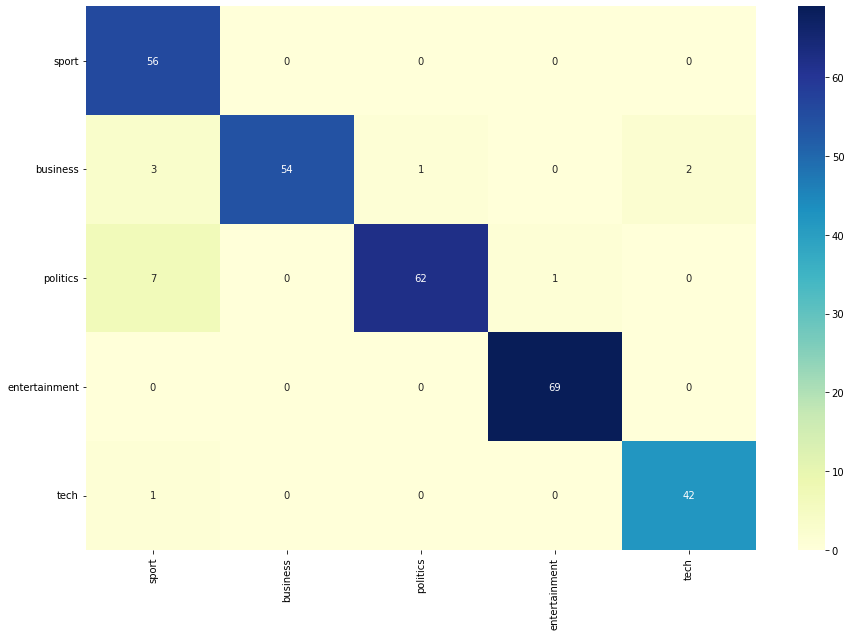

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(test_category, mnb_test_predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, index=("sport","business","politics","entertainment","tech"), columns=("sport","business","politics","entertainment","tech"))

plt.figure(figsize=(15, 10))
sn.heatmap(conf_matrix_df, annot=True, vmin=0, vmax=conf_matrix.max(), fmt='d', cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
#matriz de confusion para intrerpretar los datos

Una fila con muchas observaciones fuera de la celda de la diagonal principal, indica una exhaustividad baja.
Si las observaciones se concentran en alguna celda fuera de la diagonal, indica que son clasificadas (erróneamente) como de la clase a la que pertenezca su fila.
Una columna con muchas observaciones fuera de la celda de la diagonal principal, indica una una precisión baja, o una contaminación en la precisión del clasificador.

In [29]:
#con k-nn podemos encontrar textos que son mas cercanos o parecidos a uno
from sklearn import neighbors

knn_classifier = neighbors.KNeighborsClassifier()
knn_classifier.fit(train_preprocessed, train_category)

knn_train_predictions = knn_classifier.predict(train_preprocessed)
knn_test_predictions = knn_classifier.predict(test_preprocessed)

print("k-NN, porcentaje de aciertos en entrenamiento:", np.mean(knn_train_predictions == train_category))
print("k-NN, porcentaje de aciertos en test:", np.mean(knn_test_predictions == test_category))

k-NN, porcentaje de aciertos en entrenamiento: 0.9588926174496645
k-NN, porcentaje de aciertos en test: 0.9496644295302014


Según los resultados es posible que se pueda encontrar parámetros para el que la diferencia entre el error de entrenamiento y test no sea tan acusada.

No obstante, el k-NN no es una técnica adecuada para este tipo de problemas donde las variables son del orden de los millares (palabras diferentes en el corpus) ya que sufre de la maldición de la dimensionalidad. Intenta buscar vecinos en un espacio de dimensiones muy elevado.

## 3) Representación basada en word-embeddings

La segunda vectorización que vamos a usar representará los mensajes usando word-embeddings. Cada documento se representará como el vector que resulta de promediar los embeddings de cada una de sus palabras. Al igual que en el apartado anterior, usaremos monogramas y las _stop words_ que vienen configuradas por defecto para el inglés. Recuerda usar como vocabulario para vectorizar el vocabulario del fichero con las word-embeddings. 

Entrena un clasificador Naive Bayes Gaussiano (el Multinomial no admite valores negativos que sí aparecen en los embeddings). Analiza el error por clase y dibuja la matriz de confusión.

Entrena otro clasificador kNN con la nueva vectorización y la configuración por defecto y analiza su error.

In [37]:
#estructura clave(termino)-valor(word-embeding)
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
glove_file = "BBC News.csv"

model = KeyedVectors.load_word2vec_format(glove_file, binary=False, no_header=True)

ModuleNotFoundError: No module named 'gensim'

In [ ]:
from scipy.sparse import find

#creamos un word embeding para cada uno de nuestras frases
def create_doc_embedding (doc_matrix_word_freq, keyedvectors):
    """
    create_doc_embedding creates a doc-embedding matrix where rows are the 
    documents and columns are the dimensions of the word-embedding. Each row r
    summarizes the vectors of the word-embeddings present in document r

    :param doc_matrix_word_freq: frequency matrix of the terms in each document
            It admits binary values, frequencies or weights.
            It admits the output of vectorizer.fit_transform
    :param keyedvectors: keyedvectors object from Gensim which has the 
            word-embedding information
    :return: returns the doc-embedding matrix that summarizes the 
             vector-embeddings of the words present in each document
    """ 

    
    num_docs, num_words= doc_matrix_word_freq.get_shape()

    # Creamos la matriz de documentos con tantas columnas como dimensiones tiene el we 
    doc_embed_matrix = np.zeros([num_docs,keyedvectors.vector_size])


    # Obtenemos los documentos
    docs, col, val = find(doc_matrix_word_freq)
    docs = np.unique(docs)

    # Para cada documento (esto se podrá hacer de forma más pythonica)
    for doc in docs:
      # Obtenemos las palabras presentes en el documento y su frecuencia
      row, words, frecs = find(doc_matrix_word_freq[doc,:])

      # Calculamos el vector medio para el documento
      # Para ello recuperamos los vectores del we presentes en el documento y 
      # los promediamos teniendo en cuenta su frecuencia
      count = 0
      for w,f in zip(words,frecs):
        doc_embed_matrix[doc,:] = doc_embed_matrix[doc,:] + (keyedvectors[w] * f)
        count = count +1
      doc_embed_matrix[doc,:] = doc_embed_matrix[doc,:]/count
    
      
    return doc_embed_matrix

In [36]:
we_vocabulary = list(model.key_to_index.keys())
# En vocabulary le pasamos el de la word-embedding, ponemos que pase los tokens a minusculas 
# Si ponemos binary a False coge frecuencias y si está en true presencia en modo binario
vectorizer = CountVectorizer(vocabulary = we_vocabulary, binary = False)
# Si usamos la lista de palabras vacías del inglés de sklearn quitamos artículos, preposiciones, etc 
#vectorizer = CountVectorizer(vocabulary = we_vocabulary, , stop_words='english', binary = False)


X = vectorizer.fit_transform(df)
#en X tendremos una matriz de frecunecias con nuestro diccionario(corpus)
# Mostramos las primeras palabras del diccionario para ver que son las mismas
tokens = vectorizer.get_feature_names_out()
# El array vectorizado tiene tantas filas como el corpus y 
# tantas columnas como palabras tiene la word-embedding
# Se trata de una matriz dispersa, pero vemos que los "the"
# están bien contabilizados y que se mantiene la ordenación del
# vocabulario dado
X.toarray()

NameError: name 'we_vocabulary' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#dibujamos el word-embeding se agrupan las palabras segun su similitud
# Escribimos las palabras a representar
words = [ "madrid", "rome", "paris", "google","yahoo", "ibm", "hardware", "pc", "winter", "summer", "spring", "tomato", "carrot", "onion"]

# Recuperamos los índices de las palabras que nos interesan  
#indexes = [model.vocab[w].index for w in words]  #gensim 3
indexes = [model.key_to_index[w] for w in words]  #gensim 4


# Componemos una matriz con los vectores 2D de las palabras que nos interesan
vectors = np.vstack([wordspace2D[i,:] for i in indexes])  

# Representamos los vectores en un diagrama de dispersión
plt.scatter(vectors[:, 0], vectors[:, 1])

for label, x, y in zip(words, vectors[:, 0], vectors[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')


In [ ]:

doc_embed_matrix = create_doc_embedding(X,model)

In [35]:
model = KeyedVectors.load_word2vec_format("BBC News.csv", binary=False, no_header=True, stop_words='english', ngram_range=(1,1))

NameError: name 'KeyedVectors' is not defined

In [ ]:
#pasamos una palabra y nos da las palabras mas similares con la similitud del coseno
x = model.most_similar(positive=['red'], topn=5)
print(x)

In [ ]:
# Al buscar un término similar a "pencil" encontramos otros objetos de papelería básicos, pero también sus plurales
x = model.most_similar(positive=['pencil'], topn=5)
print(x)

In [ ]:
#comparamos
from sklearn.metrics.pairwise import cosine_similarity

query = vectorizer.fit_transform(['I had a marvelous snack'])

embed_query = create_doc_embedding(query,model)

simil = cosine_similarity(embed_query, doc_embed_matrix)
#nos devuelve el valor de similitud para cda una de nuestras palabras
#si queremos saber la tematica de cada frase
#podemos saber que frase es mas similiar a nuestra tematica de coorpus
print(simil)

## 4) Análisis comparativo final

Hemos entrenado dos clasificadores usando dos vectorizaciones diferentes de los datos. Compara la tasa de acierto de todos ellos y explica a qué crees que se deben las diferencias.

Busca un mensaje mal clasificado por el Naive Bayes con vectorización de frecuencias y otro mal clasificado por el k-NN con Word-embeddings. Analiza los vectores de términos de dichos mensajes e intenta razonar por qué ha sido clasificado erróneamente.

Para el Naive Bayes con vectorización de frecuencias, elige dos clases donde el clasificador no haya funcionado bien y analiza las palabras más relevantes para clasificar una noticia como de dichas clases. Razona si lo que ves crees que influye en la posible confusión a la hora de clasificar entre dichas clases.